Student Name: Paul Minogue

Student ID: 21196354

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmap

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn import metrics

import warnings

## Dataset

In [2]:
df = pd.read_csv("./loans_train_prepared.csv")
df_backup = df.copy()
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


## Plotting Function

In [3]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.rcParams["figure.figsize"]=12,6
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

## k-Means

In [4]:
inertia_list = []
silhoutte_coef_list = []

for _k in range(2, 16):
    _KMeans_obj = cluster.KMeans(n_clusters=(_k), n_init=10, max_iter=1000, random_state=0).fit(data)
    _data_and_centers = np.r_[data, _KMeans_obj.cluster_centers_]
    _inertia = _KMeans_obj.inertia_
    _silhoutte_coef = metrics.silhouette_score(data, _KMeans_obj.labels_, metric='euclidean')
    inertia_list.append(_inertia)
    silhoutte_coef_list.append(_silhoutte_coef)
    _str = 'Inertia: {0:.2f}' + \
            ' ' * ((3 - (len(str(np.floor(_inertia))))) + 8) + \
            ' Silhoutte Coef: {1:.2f}'
    print(_str.format(_inertia, _silhoutte_coef))

Inertia: 1127.62      Silhoutte Coef: 0.15
Inertia: 1005.85      Silhoutte Coef: 0.16
Inertia: 914.40       Silhoutte Coef: 0.16
Inertia: 848.13       Silhoutte Coef: 0.15
Inertia: 799.55       Silhoutte Coef: 0.15
Inertia: 759.88       Silhoutte Coef: 0.16
Inertia: 725.15       Silhoutte Coef: 0.16
Inertia: 702.30       Silhoutte Coef: 0.17
Inertia: 673.02       Silhoutte Coef: 0.17
Inertia: 656.63       Silhoutte Coef: 0.18
Inertia: 633.40       Silhoutte Coef: 0.19
Inertia: 628.23       Silhoutte Coef: 0.17
Inertia: 609.00       Silhoutte Coef: 0.17
Inertia: 591.51       Silhoutte Coef: 0.18


### Elbow Method

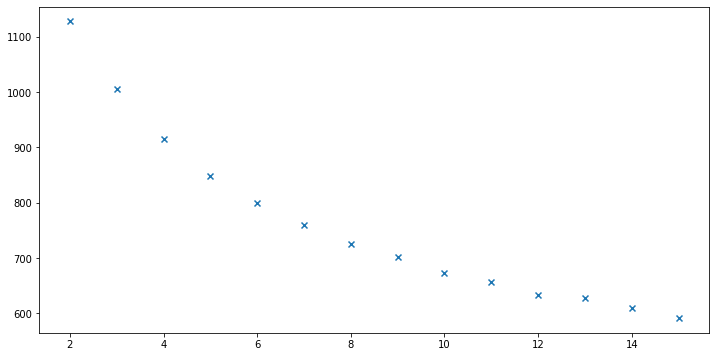

In [5]:
plt.rcParams["figure.figsize"]=12,6
plt.scatter(range(2, 16), inertia_list, marker='x')
plt.show()

It's not very clear where the *elbow* is in this plot. &ensp; There's certainly something changing around 6-8, but it's hard to be certain.

### Silhouette Coefficient

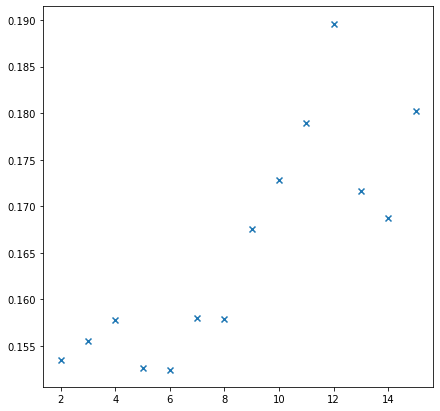

In [6]:
plt.rcParams["figure.figsize"]=7,7
plt.scatter(range(2, 16), silhoutte_coef_list, marker='x')
plt.show()

This isn't very helpful looking, but I haven't looked into it at all yet.

### MDS

In [7]:
k = 6

In [8]:
KMeans_obj = cluster.KMeans(n_clusters=k, n_init=20, max_iter=2000, tol=0.00001, random_state=0).fit(data)

In [9]:
data_and_centers = np.r_[data, KMeans_obj.cluster_centers_]

In [10]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)

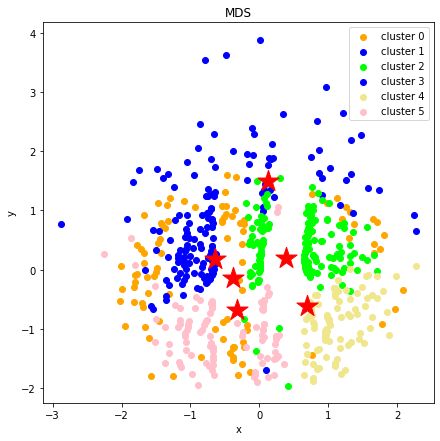

In [11]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=KMeans_obj.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

### t-SNE

In [12]:
warnings.filterwarnings('ignore')

XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)

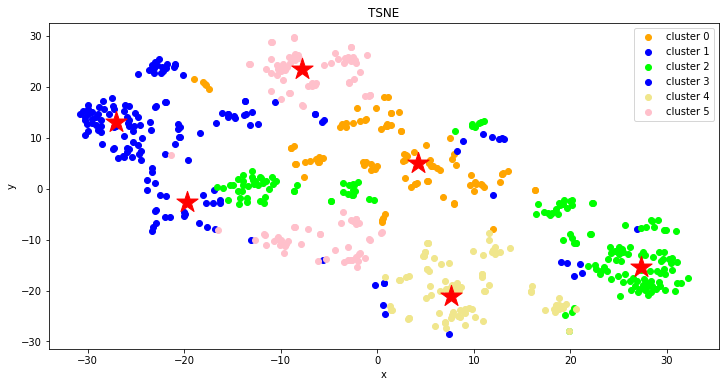

In [13]:
clustering_scatterplot(points=XYcoordinates[:-k,:],
                       labels=KMeans_obj.labels_,
                       centers=XYcoordinates[-k:,:],
                       title='TSNE')

### Analysis

In [14]:
df = df_backup.copy()

In [15]:
df['cluster'] = pd.Series(KMeans_obj.labels_, index=df.index)

In [16]:
df.head()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0    0.000000         1.084523    1.058140              0.75               1   
1    0.333333         0.925883    1.047319              0.75               1   
2    0.000000         0.683858    0.635920              0.75               1   
3    0.000000         0.608992    1.002824              0.75               1   
4    0.000000         1.101869    1.115650              0.75               1   

   Gender_Male  Gender_nan  Married_Yes  Married_nan  Self_Employed_Yes  \
0            1           0            0            0                  0   
1            1           0            1            0                  0   
2            1           0            1            0                  1   
3            1           0            1            0                  0   
4            1           0            0            0                  0   

   Self_Employed_nan  Education_Not Graduate  Property_Area_Semiurban  \
0                  0                       0                        0   
1                  0                       0                        0   
2                  0                       0                        0   
3                  0                       1                        0   
4                  0                       0                        0   

   Property_Area_Urban  Loan_Status_Y  TotalIncome  cluster  
0                    1              1     0.841086        5  
1                    0              0     0.871711        0  
2                    1              1     0.385189        3  
3                    1              1     0.717012        3  
4                    1              1     0.860305        5

In [17]:
df_mean = df.groupby('cluster').mean()

In [18]:
df_mean

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
cluster                                                              
0          0.294737         0.806684    1.029494          0.699211   
1          0.388889         1.795356    1.601154          0.710417   
2          0.319192         0.830646    1.084466          0.715455   
3          0.360825         0.829225    1.041764          0.688918   
4          0.081481         0.810512    0.959996          0.721667   
5          0.056075         0.822349    0.939642          0.739486   

         Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
cluster                                                                      
0              0.347368     0.884211    0.042105     0.821053     0.000000   
1              0.850000     0.783333    0.083333     0.716667     0.000000   
2              0.993939     0.963636    0.006061     1.000000     0.000000   
3              0.989691     0.969072    0.000000     1.000000     0.000000   
4              0.877778     0.444444    0.022222     0.166667     0.022222   
5              0.953271     0.607477    0.009346     0.000000     0.009346   

         Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
cluster                                                                 
0                 0.094737           0.031579                0.473684   
1                 0.350000           0.050000                0.033333   
2                 0.127273           0.042424                0.206061   
3                 0.092784           0.061856                0.175258   
4                 0.133333           0.066667                0.211111   
5                 0.093458           0.065421                0.158879   

         Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
cluster                                                                
0                       0.189474             0.284211       0.010526   
1                       0.316667             0.300000       0.633333   
2                       0.642424             0.000000       0.945455   
3                       0.000000             1.000000       0.845361   
4                       1.000000             0.000000       0.766667   
5                       0.000000             0.560748       0.710280   

         TotalIncome  
cluster               
0           0.748587  
1           1.751403  
2           0.825896  
3           0.807086  
4           0.698464  
5           0.710907

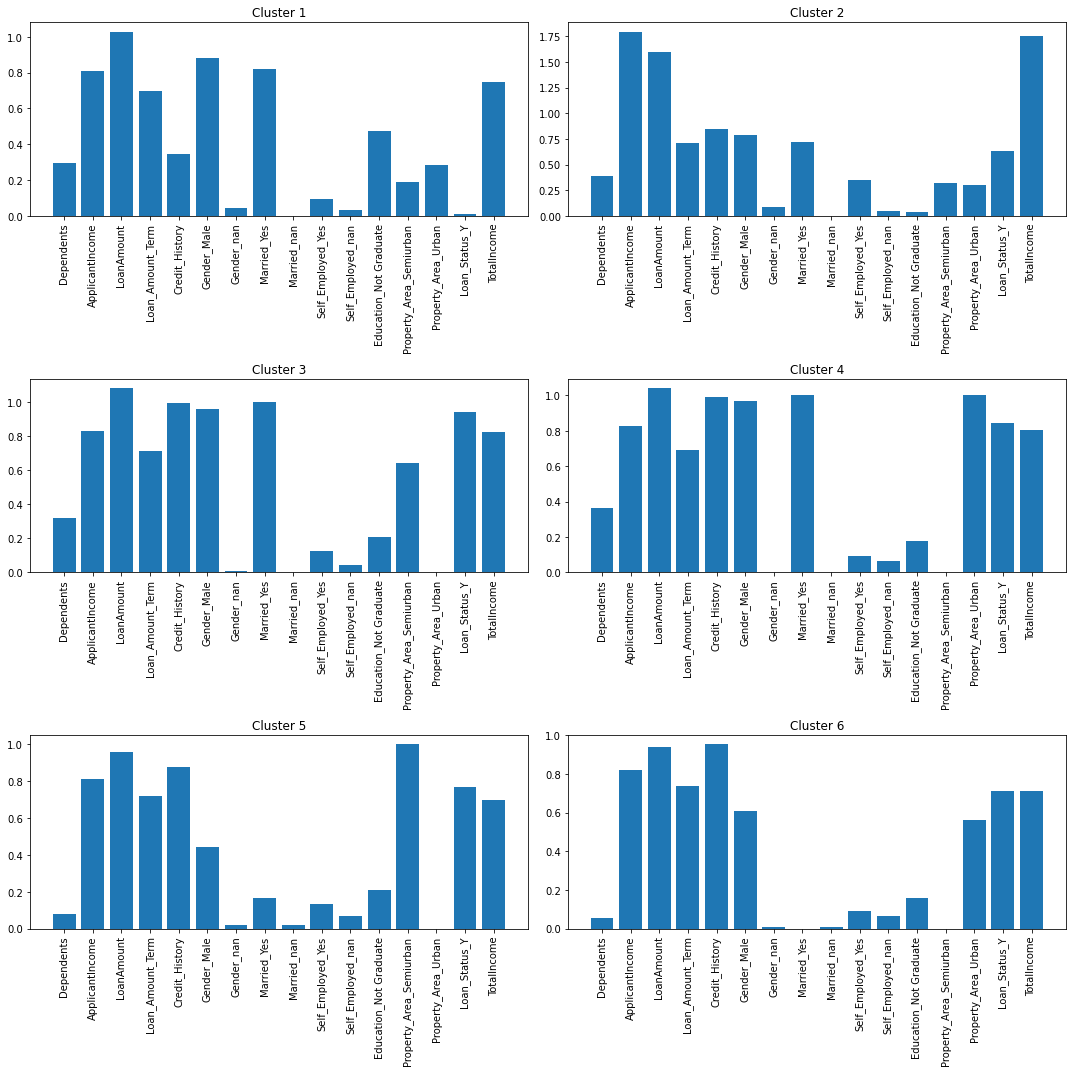

In [19]:
i = 0
fig, ax = plt.subplots(3, 2, figsize=(15,15))
for j in range(3):
    for k in range(2):
        _row = df_mean.iloc[i]
        _list = _row.values.tolist()
        
        ax[j, k].bar(list(df_mean), _list)
        
        ax[j, k].tick_params(axis='x', rotation=90)
        ax[j, k].set_title('Cluster ' + str(i+1), fontsize = 12)
        
        i += 1
    
plt.tight_layout()
#plt.subplots_adjust(wspace=6, hspace=2)

plt.show()

*note the different scale in Cluster 2*

#### Cluster 1:
Mostly married, lower level of education, low credit history.

#### Cluster 2:
Mostly married, high education level, very high income, large loan (possibly mortgage).

#### Cluster 3:
Married, some dependants, semi-urban/rural area.

#### Cluster 4:
Married, some dependants, urban area.

#### Cluster 5:
Un-married, few dependants, semi-urban area.

#### Cluster 6:
Un-married, few dependants, urban area.

### Summary

Clusters 3-6 seem to represent combinations of two attributes - area the person lives and their family status (marriage, children) and the area they live in, with most other attributes having a similar mean across these clusters.

Clusters 1 and 2 seem to highlight different attributes. &ensp; Cluster 1 represents married people without third level education and low credit history. &ensp; Cluster 2 represents married people with good income and education, but with a very high loan amount and term length. &ensp; Given that there is no *mortgage* attribute, it's reasonable to assume this could represent a person with a mortgage. &ensp; Interesting, Cluster 2 has the lowest success rate of being granted a loan after Cluster 1.

## Spectral Clustering

In [20]:
SpecClus_obj = cluster.SpectralClustering(assign_labels='discretize', n_clusters=6, random_state=0).fit(data)

In [21]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data)

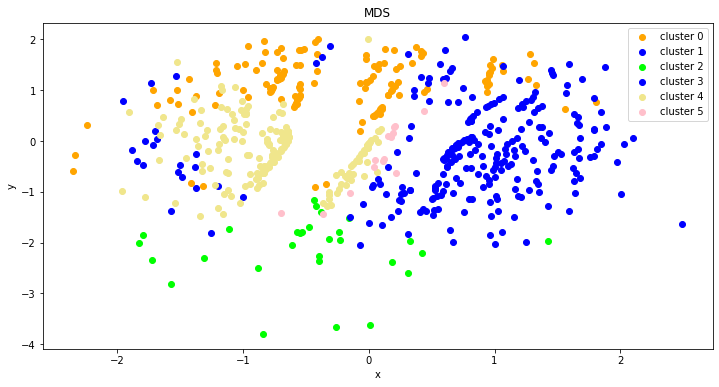

In [22]:
clustering_scatterplot(points=XYcoordinates[:,:], 
                       labels=SpecClus_obj.labels_, 
                       centers=None, 
                       title='MDS')

In [23]:
warnings.filterwarnings('ignore')

XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data)

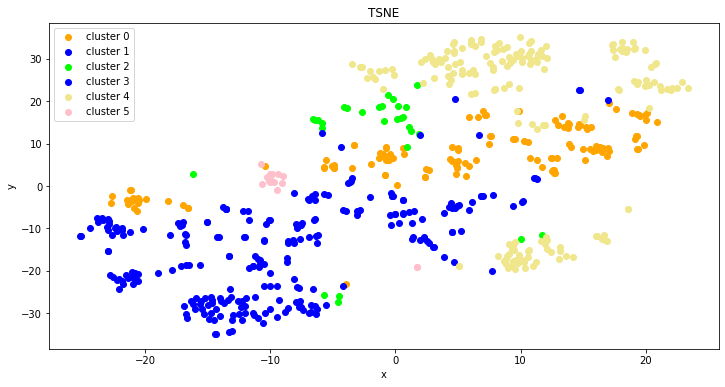

In [24]:
clustering_scatterplot(points=XYcoordinates[:,:],
                       labels=SpecClus_obj.labels_,
                       centers=None,
                       title='TSNE')

In [25]:
df = df_backup.copy()

In [26]:
df['spec_cluster'] = pd.Series(SpecClus_obj.labels_, index=df.index)

In [27]:
df_mean_spec = df.groupby('spec_cluster').mean()

In [28]:
df_mean_spec

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
spec_cluster                                                              
0               0.074074         0.856808    0.956105          0.737222   
1               0.285372         0.867645    1.030056          0.688489   
2               0.402299         2.063838    1.769277          0.711207   
3               0.269006         0.849894    1.050685          0.708772   
4               0.302198         0.867006    1.107892          0.714835   
5               0.355556         0.798610    1.055002          0.750000   

              Credit_History  Gender_Male  Gender_nan  Married_Yes  \
spec_cluster                                                         
0                   0.940741     0.429630    0.022222     0.007407   
1                   0.992806     0.956835    0.007194     0.748201   
2                   0.931034     0.862069    0.068966     0.758621   
3                   0.333333     0.859649    0.035088     0.728070   
4                   0.989011     0.884615    0.016484     0.950549   
5                   1.000000     0.933333    0.000000     1.000000   

              Married_nan  Self_Employed_Yes  Self_Employed_nan  \
spec_cluster                                                      
0                0.014815           0.133333           0.059259   
1                0.007194           0.093525           0.079137   
2                0.000000           0.344828           0.034483   
3                0.000000           0.140351           0.026316   
4                0.000000           0.126374           0.038462   
5                0.000000           0.133333           0.133333   

              Education_Not Graduate  Property_Area_Semiurban  \
spec_cluster                                                    
0                           0.222222                 0.503704   
1                           0.136691                 0.000000   
2                           0.034483                 0.206897   
3                           0.412281                 0.201754   
4                           0.120879                 0.747253   
5                           1.000000                 0.000000   

              Property_Area_Urban  Loan_Status_Y  TotalIncome  
spec_cluster                                                   
0                        0.148148       0.755556     0.709154  
1                        0.992806       0.805755     0.842621  
2                        0.241379       0.655172     1.981529  
3                        0.324561       0.008772     0.778824  
4                        0.000000       0.950549     0.877250  
5                        0.000000       1.000000     0.727952

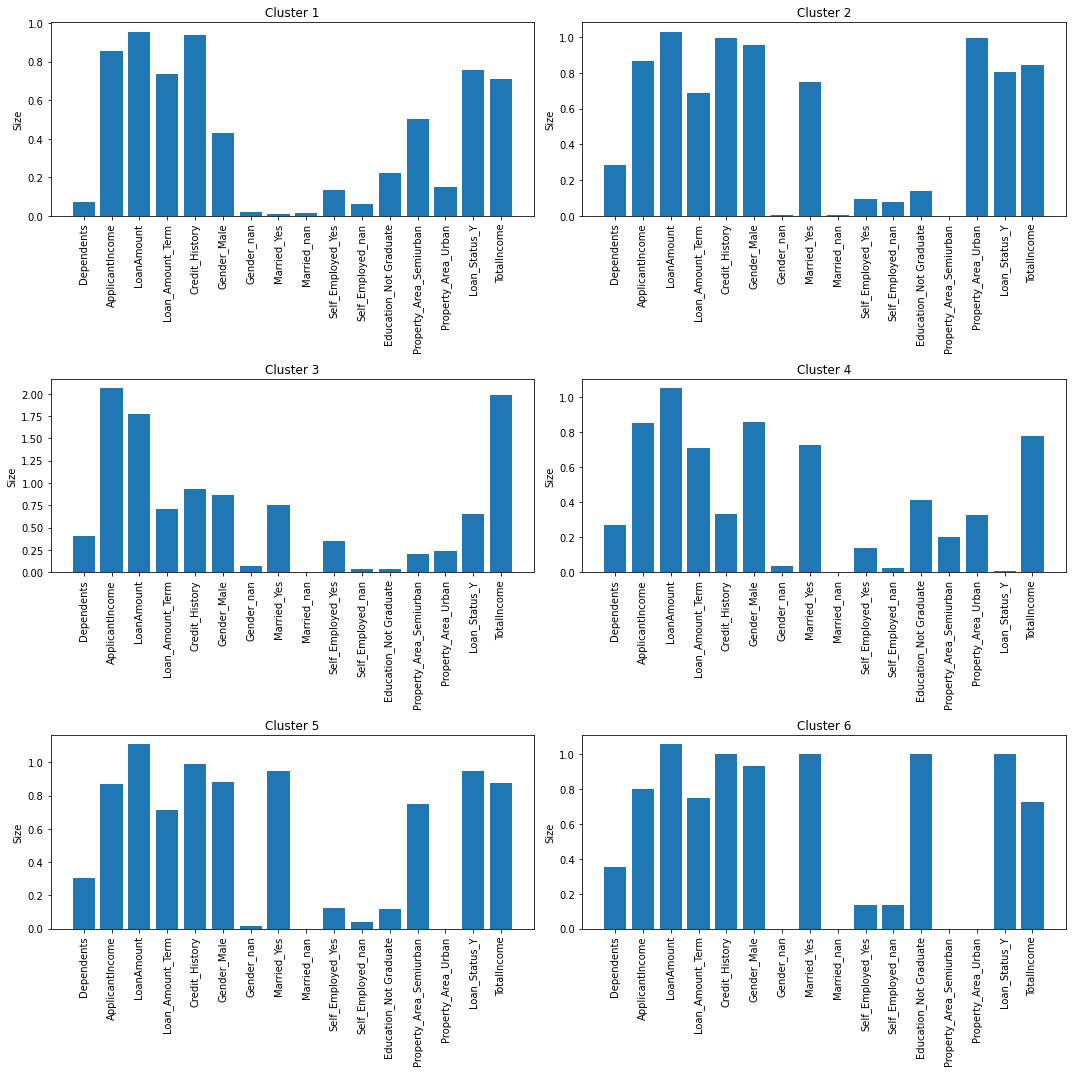

In [29]:
i = 0
fig, ax = plt.subplots(3, 2, figsize=(15,15))
for j in range(3):
    for k in range(2):
        _row = df_mean_spec.iloc[i]
        _list = _row.values.tolist()
        
        ax[j, k].bar(list(df_mean), _list)
        
        ax[j, k].tick_params(axis='x', rotation=90)
        ax[j, k].set_title('Cluster ' + str(i+1), fontsize = 12)
        ax[j, k].set_ylabel('Size', fontsize = 10)
        
        i += 1
    
plt.tight_layout()
# plt.subplots_adjust(wspace=6, hspace=2)

plt.show()

*note the different scale in Cluster 3*

#### Cluster 1:
Un-married, few dependants, semi-urban area. (similar to k-Means Cluster 5, but with more of lean towards a rural area)

#### Cluster 2:
Married, some dependants, urban area. (similar to k-Means Cluster 4)

#### Cluster 3:
Mostly un-married, high education level, very high income, large loan (possibly mortgage). 
(similar to k-Means Cluster 2)

#### Cluster 4:
Mostly married, lower level of education, low credit history. (similar to k-Means Cluster 1, but being married and have a higher education level are slightly less emphasised here)

#### Cluster 5:
Married, some dependants, semi-urban/rural area. (similar to k-Means Cluster 3)

#### Cluster 6:
Almost all married, moderate number of dependants, very low level of education, rural area. (no close k-Means match)

### Summary
For most of the clusters, there was a reasonably similar cluster found using k-Means, but a completely unique cluster was found here.  &ensp; Cluster 6 here represents a married person living very likely to have a lower level of education and live in a rural area. &ensp; No cluster from k-Means had either higher incidence of of low education level or rural living, and Spectral Clustering here used both to characterise a cluster.

Cluster 6 (just by coincidence) from k-Means wasn't massively characteristic in any way, but it represented un-married people in an urban area. &ensp; This demographic isn't fully caught using Spectral Clustering.

This was very interesting. &ensp; k-Means found a cluster to capture single urban living people and Spectral Clustering found one to capture married rural people with low education level.

### Clustering similarity

Given how similar the two sets of cluster appear to be, it's worth doing some a correlation check between them just to emphasise it. &ensp; The code below loops over all 36 combinations between the attribute means of the 6 k-Means clusters and the 6 Spectral Clustering clusters and calculates the sum of the squared errors between them.

In [30]:
diffs = []
for i in range(len(df_mean)): # loop over the k-Means means
    _temp = []
    for j in range(len(df_mean_spec)): # loop over the Spectral Clustering means
        _sum = 0
        for k in range(df_mean.loc[i].size): # loop over attributes of cluster pair
            _sum += (df_mean.loc[i][k] - df_mean_spec.loc[j][k])**2 # squared difference
        _temp.append(_sum)
    diffs.append(_temp)

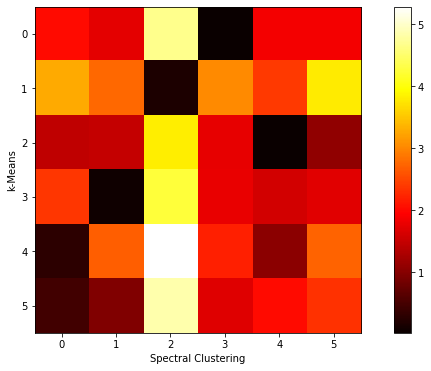

In [31]:
m = np.array(diffs)
plt.imshow(m, cmap=cmap.hot)
plt.colorbar()
plt.xlabel("Spectral Clustering")
plt.ylabel("k-Means")
plt.show()

As seen above, five clusters from each set correlate well with one from the other set, but the 6th cluster from the Spectral Clustering isn't similar  to any from k-Means.

# Summary

TBD